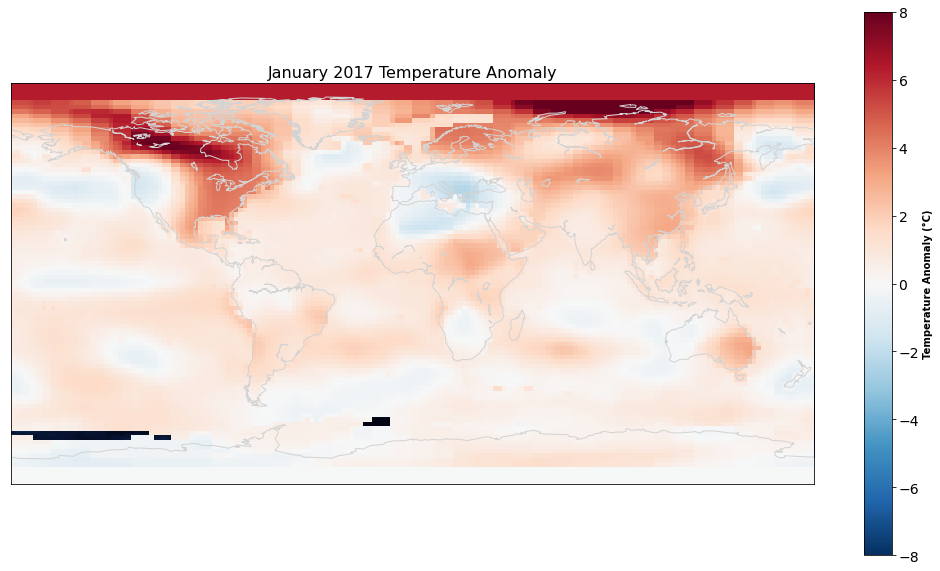

In [118]:
import glob
import os
import numpy as np
import nbimporter

from netCDF4 import Dataset
from netCDF4 import date2index
from datetime import datetime

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import plotly.graph_objects as go

def analyze_global_temp_anomalies(year, month):
    
    """
    This function plots the average temperature anomalies (deg C) based upon observational averages versus the 1951-1980
    climateology. The function loads the monthly anomaly data (from the Global Historical Climate Network)
    for 2 by 2 degree latitude and longitude zones across the globe with a resolution of 1200km. This is loaded as is
    from a .nc file and then sliced based upon the year and the month provided by the user. This data is then plotted
    using basemap and pcolormesh to illustrate the anomalies across the globe.
    
    Inputs:
    year (integer): the year of the average temperature anomalies to be pulled
    
    month (string): the month pertaining to the average temperature anomalies desired for said month
    
    Returns:
    Global Temperature Anomalies Map illustrating the temperature difference from average for that month of the year.
    
    """
    
    ## Must have try and except block here to account for how this function reacts to inputs from a dropdown Jupyter
    #     widget. An error is generated upon first generating the dropdown menu. The table automatically updates based
    #     a change in the inputs, and if an input is not filled, an error will be generated. This is not something that
    #     can be solved by another method as there is no "direct" source.
    try:
        
        ## Locate and pull the file being called
        filepath = glob.glob(os.getcwd() + '/gistemp1200_GHCNv4_ERSSTv5.nc') 

        ## Extract file from list
        used_filepath = filepath[0]

        ## Read the .nc file
        global_data = Dataset(used_filepath)

        ## Organize a dictionary encoding month to a number, this is for the datetime notation
        month_dic = {'January': 1, 'February': 2,
                          'March': 3, 'April': 4, 'May': 5,
                          'June': 6, 'July': 7,
                          'August': 8, 'September': 9, 'October': 10,
                          'November': 11, 'December': 12}
        
        ## Pull the datetimes for all of the zones that will be sliced.
        #     Datetime is organized by year, moth, and day. "Day" is always == 15
        timeindex = date2index(datetime(year, month_dic[month], 15),
                           global_data.variables['time'])
        
        ## Gathering lat and lons
        lat = global_data.variables['lat'][:]
        lon = global_data.variables['lon'][:]
        ## Create a meshgrid so that the borders of the 2x2 deg zones can be create
        lon, lat = np.meshgrid(lon, lat)
        
        ## Slice the temperature anomalies based upon the time index provided
        temp_anomaly = global_data.variables['tempanomaly'][timeindex]
        
        ## Create figure
        fig = plt.figure(figsize=(18, 10))

        ## Create the basemap projection that will hold the data
        m = Basemap(projection='cyl', resolution='c', 
                lat_0=0, lon_0=0,)
        m.bluemarble(scale=0.5)
        ## Map the anomalies based upon zone
        m.pcolormesh(lon, lat, temp_anomaly,
                 latlon=True, cmap='RdBu_r')
        
        plt.clim(-8, 8) # Colorbar limits
        m.drawcoastlines(color='lightgray')
        
        plt.title(month + ' ' + str(year) + ' Temperature Anomaly', fontsize = 16)
        
        ## Create colorbar and bold title
        cb = plt.colorbar()
        cb.set_label(label='Temperature Anomaly (°C)', weight='bold')

        plt.show()
        
    ## Except block for when dropdown initially fails before fields are filled out
    except Exception:
        pass

    return

## Manual test performed to match regional anomalies to actual anomalies. I matched what visually appeared on the map
#     when loaded to the approximations shown by some of the City Timeseries plots on the NCDC.gov/cag/ website. These
#     tests are meant to represent that this data has been checked for relative accuracy. All looks good
def testing_anomalies():
    
    # First Ex: Alaska in November 1979
    Alaska_Nov_1979_anom = 5
    actual_Alaska_anom = 5
    assert abs(Alaska_Nov_1979_anom - actual_Alaska_anom) <= 1
    
    # Second Ex: North Carolina in April 2003
    NC_April_2003_anom = 0
    actual_NC_anom = 0
    assert abs(NC_April_2003_anom - actual_NC_anom) <= 1
    
    # Third Example: Michigan in January 2017
    MI_Jan_2017_anom = 4
    actual_MI_anom = 4
    assert abs(MI_Jan_2017_anom - actual_MI_anom) <= 1
    
    ## All examples and other mental comparitive tests relatively match the city observational anomalies for that time
    
    ## Unfortunately, only the US locations can be checked with the available resources, however, these tests should
    #     provide confidence that the software is working as intended with the actual productive being relatively
    #     accurate.
    
    return

analyze_global_temp_anomalies(2017, 'January')
